# Project 1 - Major League Baseball Analysis

In [1]:
#PROJECT SCOPE:

#Question 1 - How does the spending of each champion compare to the rest of the league?
#Objective 1 - Collect the salary spent for the world series champions by year
#Objective 2 - Collect the average salary spent for the losers by year
#Objective 3 - Summary DF and Graph comparing objective 1 and objective 2

#---------------------------------------------------------------------------------

#Question 2 - What are the guiding parameters for salary spent for winning teams?
#Objective 1 - Find the mean and STD for the salaries per year for the entire league
#Objective 2 - Calculate the number of STD's the winning salary deviates from the mean by year
#Objective 3 - Summary DF and Graph Objective 2

#----------------------------------------------------------------------------------

#Question 3 - Do the teams that spend the most, win the most?
#Objective 1 - Find the top 5 teams in salary spent per year
#Objective 2 - Find out how many times teams with a top 5 salary spent won the championship by year
#Objective 3 - Calculate the percentage of times a top 5 salary spent team won the championship

#----------------------------------------------------------------------------------

#Question 4 - Are there any commonalities between championship teams?
#Objective 1 - Summary DF of all World Series Champions statistics
#Objective 2 - Statisical Analysis on that Dataframe (mean of statistical categories)
#Objective 3 - Develop a statistical profile for a typical world series champion

In [2]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as tkr
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from numpy import array

## Gathering and Organizing Data

In [3]:
#CSV Read Ins from Kaggle Website

#Teams File - Convert to DataFrame
teams_filepath = "Resources/Teams.csv"
teams_df = pd.read_csv(teams_filepath)

#Salary File - COnvert to DataFrame
salary_csvpath = "Resources/Salaries.csv"
salary_df = pd.read_csv(salary_csvpath)

In [4]:
#Dataframe Cleanup - Preparing Dataframes to Analyze

#Teams CSV - Organize Columns, Drop Years Prior to 1985
teams_df = teams_df[["name", "teamID", "yearID", "WSWin", "G", "W", "L", "R", "AB", "H", "2B", "3B", "HR", "BB", "SO", "SB", "ER", "ERA", "CG", "E"]]
teams_df = teams_df.loc[teams_df["yearID"] > 1984]

#Salary CSV - Group Salary Dataframe by YearID & TeamID, retrieve sum
salary_year = salary_df.groupby(by=['yearID','teamID'])['salary'].sum()
salary_df = pd.DataFrame(salary_year)

In [5]:
#Get Stats Data for the Winners & Losers of the World Series
ws_winners_df = pd.DataFrame(teams_df.loc[(teams_df["WSWin"] == "Y")])
ws_losers_df = pd.DataFrame(teams_df.loc[(teams_df["WSWin"] == "N")])

In [6]:
#Merge Dataframes to get Stats Data and Salary Data in one dataframe
combined_allteams_df = pd.merge(teams_df, salary_df, on=["yearID", "teamID"])
combined_wswinners_df = pd.merge(ws_winners_df, salary_df, on=["yearID", "teamID"])
combined_wslosers_df = pd.merge(ws_losers_df, salary_df, on=["yearID", "teamID"])

In [7]:
#See Combined Dataframe
combined_allteams_df.head()

,name,teamID,yearID,WSWin,G,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,E,salary
0,Atlanta Braves,ATL,1985,N,162,66,96,632,5526,1359,...,28,126,553,849.0,72.0,678,4.19,9,159,14807000
1,Baltimore Orioles,BAL,1985,N,161,83,78,818,5517,1451,...,22,214,604,908.0,69.0,694,4.38,32,115,11560712
2,Boston Red Sox,BOS,1985,N,163,81,81,800,5720,1615,...,31,162,562,816.0,66.0,659,4.06,35,145,10897560
3,California Angels,CAL,1985,N,162,90,72,732,5442,1364,...,31,153,648,902.0,106.0,633,3.91,22,112,14427894
4,Chicago White Sox,CHA,1985,N,163,85,77,736,5470,1386,...,37,146,471,843.0,108.0,656,4.07,20,111,9846178


In [8]:
#See World Series Winners Dataframe
combined_wswinners_df.head()

,name,teamID,yearID,WSWin,G,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,E,salary
0,Kansas City Royals,KCA,1985,Y,162,91,71,687,5500,1384,...,49,154,473,840.0,128.0,567,3.49,27,127,9321179
1,New York Mets,NYN,1986,Y,162,108,54,783,5558,1462,...,31,148,631,968.0,118.0,513,3.11,27,138,15393714
2,Minnesota Twins,MIN,1987,Y,162,85,77,786,5441,1422,...,35,196,523,898.0,113.0,734,4.63,16,98,6397500
3,Los Angeles Dodgers,LAN,1988,Y,162,94,67,628,5431,1346,...,25,99,437,947.0,131.0,481,2.96,32,142,16850515
4,Oakland Athletics,OAK,1989,Y,162,99,63,712,5416,1414,...,25,127,562,855.0,157.0,497,3.09,17,129,15613070


In [9]:
#See World Series Losers Dataframe
combined_wslosers_df.head()

,name,teamID,yearID,WSWin,G,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,E,salary
0,Atlanta Braves,ATL,1985,N,162,66,96,632,5526,1359,...,28,126,553,849.0,72.0,678,4.19,9,159,14807000
1,Baltimore Orioles,BAL,1985,N,161,83,78,818,5517,1451,...,22,214,604,908.0,69.0,694,4.38,32,115,11560712
2,Boston Red Sox,BOS,1985,N,163,81,81,800,5720,1615,...,31,162,562,816.0,66.0,659,4.06,35,145,10897560
3,California Angels,CAL,1985,N,162,90,72,732,5442,1364,...,31,153,648,902.0,106.0,633,3.91,22,112,14427894
4,Chicago White Sox,CHA,1985,N,163,85,77,736,5470,1386,...,37,146,471,843.0,108.0,656,4.07,20,111,9846178


## Question 1 - How does the spending of each champion compare to the rest of the league?

Objective 1 - Collect the salary spent for the world series champions by year and Graph!

Text(0, 0.5, 'Salary Amount (USD)')

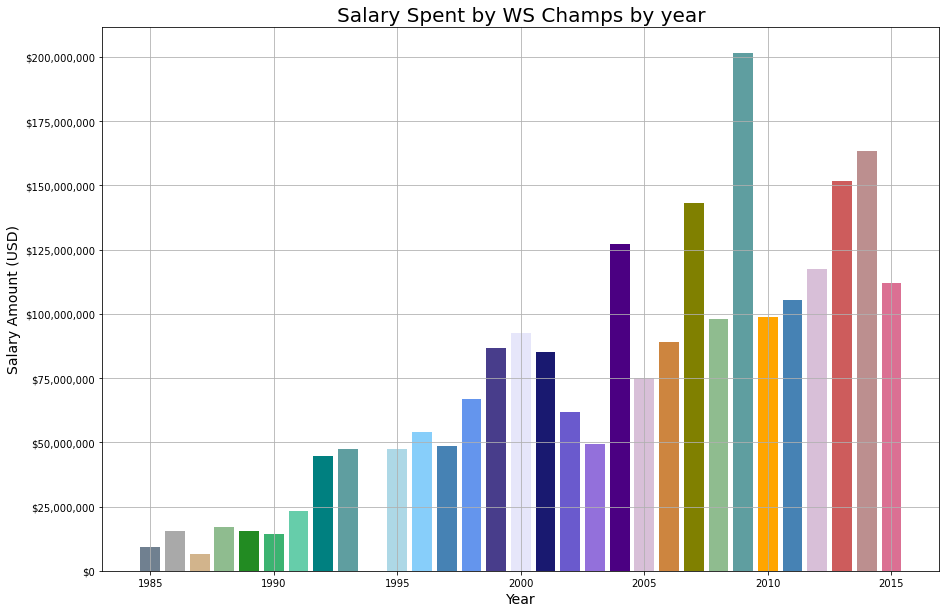

In [10]:
#World Series Winners - Salary Spent Bar Chart
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.grid(True)
my_colors = ['slategray', 'darkgray', 'tan', 'darkseagreen', 'forestgreen', 'mediumseagreen', 'mediumaquamarine', 'teal', 'cadetblue', 'lightblue', 'lightskyblue', 'steelblue', 'cornflowerblue', 'darkslateblue','lavender', 'midnightblue', 'slateblue', 'mediumpurple', 'indigo', 'thistle', 'peru', 'olive', 'darkseagreen', 'cadetblue', 'orange', 'steelblue', 'thistle', 'indianred', 'rosybrown', 'palevioletred' ]*5 # <-- this concatenates the list to itself 5 times.

#Formatting
ax1.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax1.get_yaxis()
plt.bar(combined_wswinners_df['yearID'],combined_wswinners_df['salary'], color= my_colors)

#Titles and Axis Labels
plt.title("Salary Spent by WS Champs by year",fontsize = 20)
plt.xlabel("Year",fontsize = 14)
plt.ylabel("Salary Amount (USD)",fontsize = 14)

#Possible Labels on Columns - Pending Code
# x_labels = ('KCA', 'NYN', 'MIN', 'LAN', 'OAK', 'CIN', 'MIN', 'TOR', 'TOR', 'ATL', 'NYA', 'FLO', 'NYA', 'NYA', 'NYA', 'ARI', 'ANA', 'FLO', 'BOS', 'CHA', 'SLN', 'BOS', 'PHI', 'NYA', 'SFN', 'SLN', 'SFN', 'BOS', 'SFN', 'KCA')
# fig1.xticklabels(x_labels)

Objective 2 - Collect the average salary spent for the losers by year

Text(0, 0.5, 'Salary Amount [USD]')

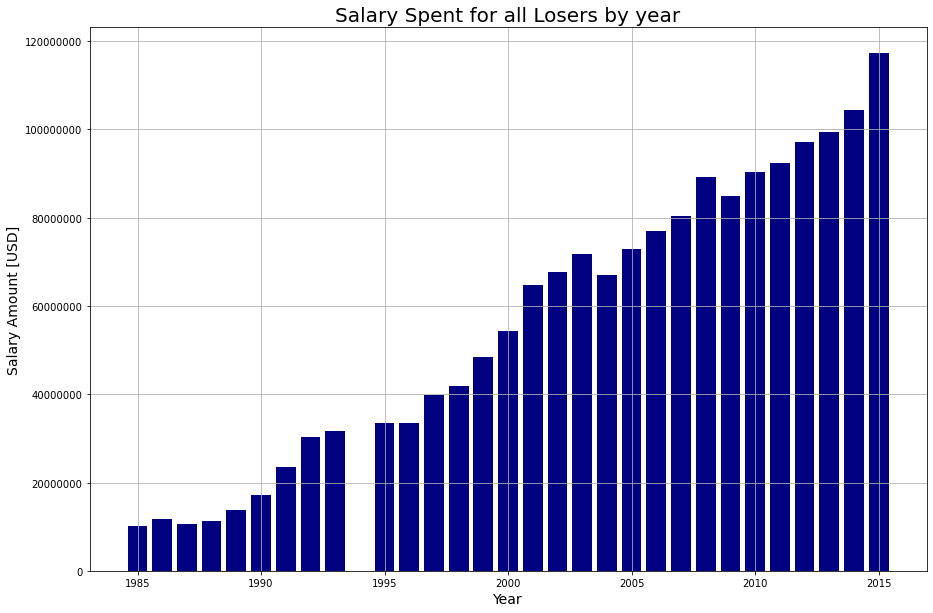

In [11]:
#World Series Losers - Average Salary Spent Dataframe
losers_salary_df = combined_wslosers_df.groupby(['yearID'])[['salary']].mean().reset_index()
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.grid(True)

# plt.bar(losers_salary_df['yearID'], losers_salary_df['salary'])
plt.bar(losers_salary_df['yearID'], losers_salary_df['salary'], color= "navy")
plt.ticklabel_format(style='plain', axis='y')

#Titles and Axis Labels
plt.title("Salary Spent for all Losers by year",fontsize = 20)
plt.xlabel("Year",fontsize = 14)
plt.ylabel("Salary Amount [USD]",fontsize = 14)

Objective 3 - Summary DF and Graph comparing objective 1 and objective 2

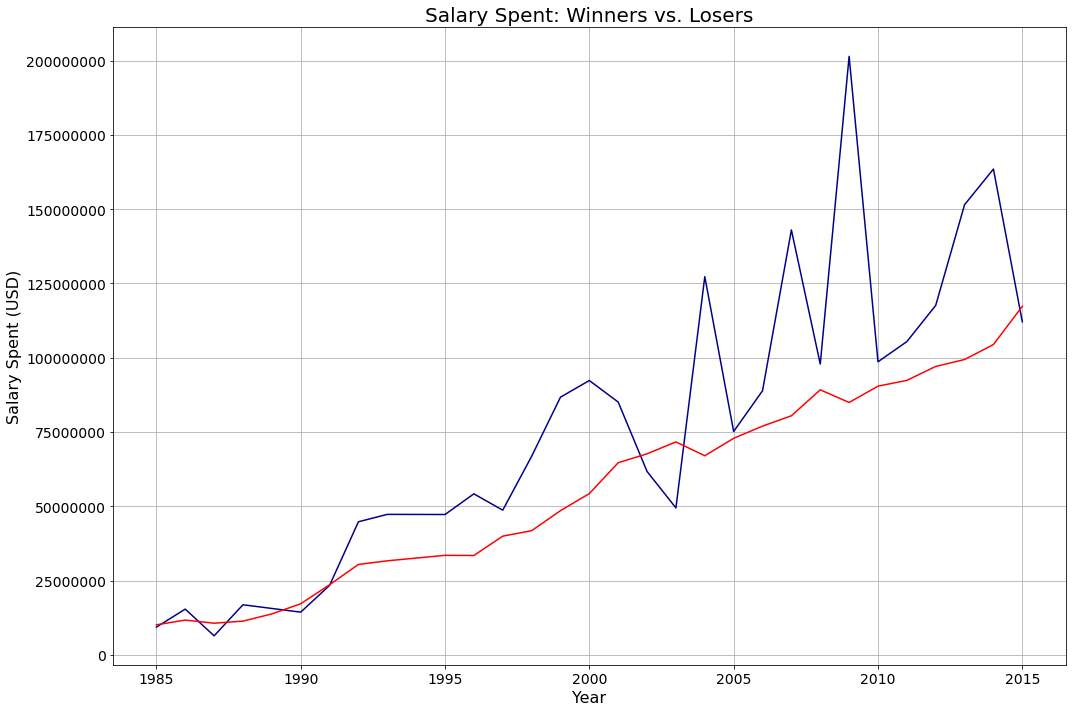

In [12]:
# #Get average Salary Spent per year for League Losers

#Groupby Dataframes
avg_salary_losers = combined_wslosers_df.groupby(by=['yearID'])['salary'].mean()
avg_salary_losers_df = pd.DataFrame(avg_salary_losers)

#Formatting
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.grid(True)

#Plot the Winning Teams Salary Spent against the Loser Teams Average Salary Spent (On Annual Basis)
plt.plot(combined_wswinners_df["yearID"], combined_wswinners_df["salary"], color="darkblue")
plt.plot(combined_wswinners_df["yearID"], avg_salary_losers_df["salary"], color="red")
plt.ticklabel_format(style='plain', axis='y')

#Titles and Axis Labels
plt.title("Salary Spent: Winners vs. Losers", fontsize= 20)
plt.xlabel("Year", fontsize= 16)
plt.ylabel("Salary Spent (USD)", fontsize= 16)
plt.xticks(size= 14)
plt.yticks(size= 14)

#Currency, Comma Seperator Code
# ax1.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
# ax1.get_yaxis()

#Run
plt.tight_layout()
plt.show()

## Question 2 - What are the guiding parameters for salary spent for winning teams?

Objective 1 - Find the mean and STD for the salaries per year for the entire league

Text(0, 0.5, 'Salary Amount (USD)')

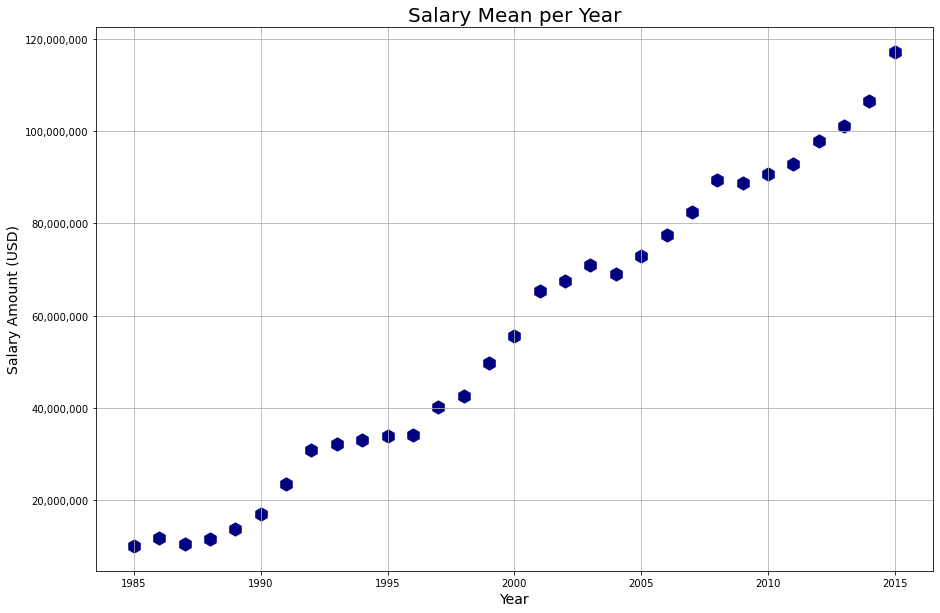

In [13]:
# #Get the mean salary spent for entire league
salary_mean = combined_allteams_df.groupby(by=['yearID'])[['salary']].mean()
salary_mean = salary_mean.reset_index()
salary_mean = salary_mean.rename(columns={"salary": "Mean Salary"})

#Formatting
fig1, ax1 = plt.subplots(figsize=(15, 10))
fmt = "{x:,.0f}"
tick = mpl.ticker.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)
ax1.grid(True)

#Graph
plt.scatter(salary_mean['yearID'],salary_mean['Mean Salary'], marker= "h", s=175, color="navy")

#Titles and Axis Labels
plt.title("Salary Mean per Year",fontsize = 20)
plt.xlabel("Year",fontsize = 14)
plt.ylabel("Salary Amount (USD)",fontsize = 14)

Text(0, 0.5, 'Salary Amount (USD)')

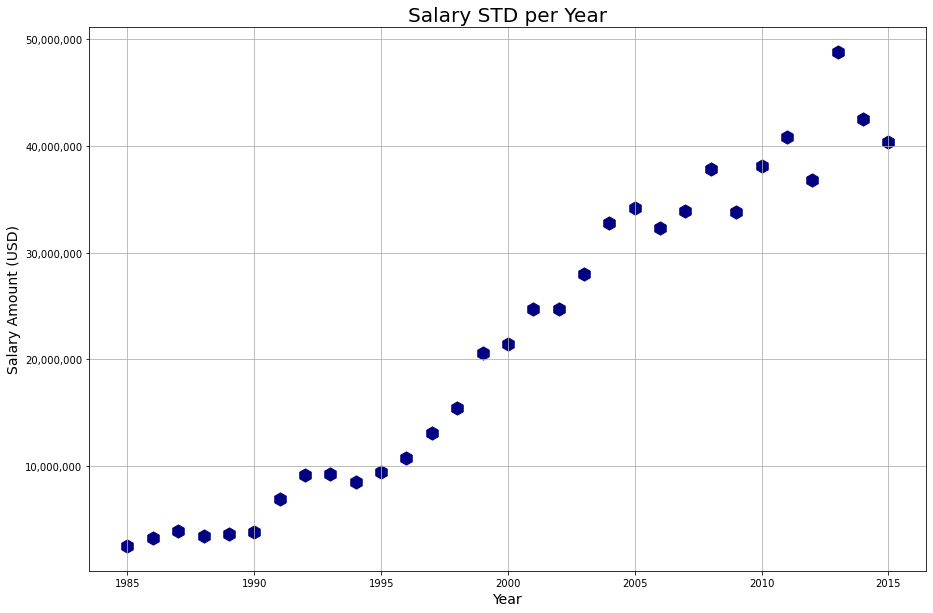

In [14]:
#Get the STD for the salary spent for entire league
salary_std = combined_allteams_df.groupby(by=['yearID'])[['salary']].std()
salary_std = salary_std.reset_index()
salary_std = salary_std.rename(columns={"salary": "STD Salary"})

#Formatting
fig1, ax1 = plt.subplots(figsize=(15, 10))
fmt = "{x:,.0f}"
tick = mpl.ticker.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)
ax1.grid(True)

#Chart the STD salary
plt.scatter(salary_std['yearID'], salary_std['STD Salary'], marker="h", s=175, color="navy")
plt.title("Salary STD per Year",fontsize = 20)
plt.xlabel("Year",fontsize = 14)
plt.ylabel("Salary Amount (USD)",fontsize = 14)

Objective 2 - Calculate the number of STD's the winning salary deviates from the mean by year

In [15]:
#Merge Mean Salary and Standard Deviation Salary Together
combined_mean_std = pd.merge(salary_mean, salary_std, on=["yearID"])
combined_mean_std.head()

,yearID,Mean Salary,STD Salary
0,1985,1.007557e+07,2.470845e+06
1,1986,1.184056e+07,3.186956e+06
2,1987,1.048367e+07,3.848337e+06
3,1988,1.155586e+07,3.386331e+06
4,1989,1.384599e+07,3.568844e+06


In [16]:
#Merge combined_mean_std dataframe with world series winners dataframe
big_df = pd.merge(combined_mean_std, combined_wswinners_df, on=["yearID"])
big_df = big_df[["yearID", "Mean Salary", "STD Salary", "salary"]]
big_df.head()

,yearID,Mean Salary,STD Salary,salary
0,1985,1.007557e+07,2.470845e+06,9321179
1,1986,1.184056e+07,3.186956e+06,15393714
2,1987,1.048367e+07,3.848337e+06,6397500
3,1988,1.155586e+07,3.386331e+06,16850515
4,1989,1.384599e+07,3.568844e+06,15613070


In [17]:
#Find STD's Away from mean
big_df["STD's from Mean"] = (big_df["salary"] - big_df["Mean Salary"]) / big_df["STD Salary"]
big_df.head()

,yearID,Mean Salary,STD Salary,salary,STD's from Mean
0,1985,1.007557e+07,2.470845e+06,9321179,-0.305315
1,1986,1.184056e+07,3.186956e+06,15393714,1.114906
2,1987,1.048367e+07,3.848337e+06,6397500,-1.061801
3,1988,1.155586e+07,3.386331e+06,16850515,1.563537
4,1989,1.384599e+07,3.568844e+06,15613070,0.495141


Objective 3 - Graph Objective 2

(array([-2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 7 Text major ticklabel objects>)

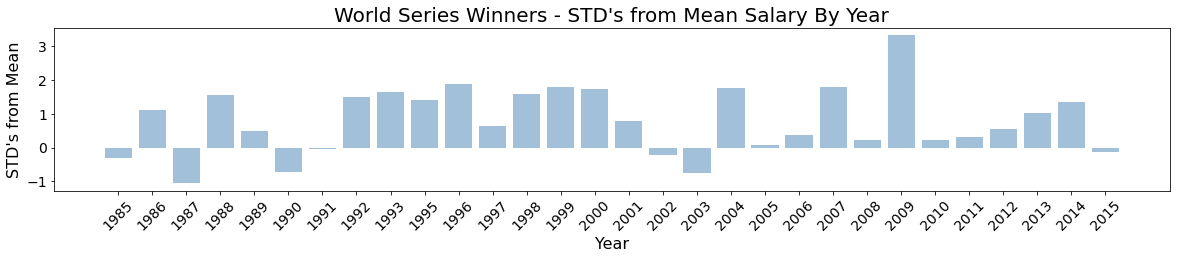

In [18]:
#Chart the STD's Away from Mean for the World Series Winners

#Set X-Axis and Tick Locations
x_axis = np.arange(len(big_df))
tick_locations = [value+0.4 for value in x_axis]

#Create List where to write x labels, and input titles
plt.figure(figsize=(20,3))
plt.bar(x_axis, big_df["STD's from Mean"], color='steelblue', alpha=0.5, align="edge")
plt.xticks(tick_locations, big_df["yearID"], rotation=45, )
plt.title("World Series Winners - STD's from Mean Salary By Year", fontsize=20)
plt.xlabel("Year", fontsize=16)
plt.ylabel("STD's from Mean", fontsize=16)
plt.xticks(size= 14)
plt.yticks(size= 14)

## Question 3 - Do the teams that spend the most, win the most?

Objective 1 - Find the top 5 teams in salary spent per year

In [19]:
#Sort for Top 5 Spenders
top_spenders = combined_allteams_df.sort_values(by=['yearID','salary'], ascending=[True, False], axis=0)[['teamID','yearID','WSWin','salary']]
top_spenders = top_spenders.replace('N', 0)
top_spenders = top_spenders.replace('Y', 1)

Objective 2 - Find out how many times teams with a top 5 salary spent won the championship by year

In [20]:
#Create List of World Series winners that were also top 5 spenders in that year
top_five_wins = []
for year in range(1985,2016):
    top_five = top_spenders[top_spenders['yearID']==year]
    top_five_wins.append(top_five.iloc[0:5]['WSWin'].sum())
top_five_wins = sum(top_five_wins)

Objective 3 - Calculate the percentage of times a top 5 salary spent team won the championship

In [21]:
#Sum the Number of World Series Winners that Were also top 5 spenders
all_wins = top_spenders['WSWin'].sum()

#Get percentage of years where a top 5 spender won the World Series
top_five_wins_percentage = top_five_wins/all_wins
print(format(top_five_wins_percentage, '.2%'))

#INSERT PIE CHART HERE????

46.67%


In [22]:
#Working on Pie Chart Dataframe
pie_dict = {
    "WS Top 5 Winners": top_five_wins,
    "All Winners": all_wins,
}
pie_df = pd.DataFrame.from_dict(pie_dict, orient="index")
pie_df


,0
WS Top 5 Winners,14.0
All Winners,30.0


In [23]:
#Pie Chart World Series Winners that also were Top 5 Spenders
#Dataframes

#Formatting
colors = ['green', 'blue']
explode = (0.1, 0)

#Plot
plot = top_five_wins.plot.pie(figsize=(15,10), colors = colors, startangle=90, explode = explode, shadow = True, autopct="%1.1f%%", fontsize = 16, legend=None)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plot.yaxis.set_label_text("")

AttributeError: 'numpy.float64' object has no attribute 'plot'

## Question 4 - Are there any commonalities between championship teams?

Objective 1 - Summary DF of all World Series Champions statistics

Objective 1 - Statisical Analysis on that Dataframe (mean of statistical categories)

Objective 1 - Develop a statistical profile for a typical world series champion

In [ ]:
HR_plot = combined_wswinners_df.plot(kind="scatter", x="name", y="HR", grid=True, figsize=(20,5), title="Home Runs by WS Winners",
                          color="Blue")
plt.xticks(rotation=90)
HR_plot

In [ ]:
Hits_plot = combined_wswinners_df.plot(kind="scatter", x="name", y="H", grid=True, figsize=(20,5), title="Runs Scored by WS Winners",
                          color="Blue")
plt.xticks(rotation=90)
Hits_plot

In [ ]:
Runs_plot = combined_wswinners_df.plot(kind="scatter", x="name", y="R", grid=True, figsize=(20,5), title="Runs Scored by WS Winners",
                          color="Blue")
plt.xticks(rotation=90)
Runs_plot